# 양자 순간이동 (Quantum Teleportation)

## 양자 프로토콜 (Quantum Protocol)

만약 여러분이 멀리 떨어져있는 친구에게 정보를 전달하고 싶을 땐 어떻게 하시나요?  
보통은 제가 가지고 있는 정보의 복사본을 친구에게 보내는 것으로 정보를 전달할 수 있습니다.

그러나, 양자역학에는 **복제 불가능의 정리 (No-cloning theorem)**에 의해 양자 상태를 복사할 수가 없습니다.  
<font color=blue>c.f) No-cloning theorem : </font> 임의의 양자 상태는 복제가 불가능하다는 이론

그렇담 양자 상태의 정보를 어떻게 보낼 수 있을까요?

## 양자 얽힘 (Quantum Entanglement)
양자 프로토콜에서는 정보를 전달하기 위해 얽힘을 사용합니다.  
이렇게 얽힘을 사용한 프로토콜로는 **초고밀도 코드화(Superdence Coding)**와 **양자 순간이동(Quantum Teleportation)**이 있습니다.  
그런데 얽힘(Entanglement)이 무엇일까요?

얽힘의 정의는 물리적 정의와 수학적 정의 두개로 나눠볼 수 있습니다.

<font color=green>**1. 물리적 정의**</font>  
한 쌍의 양자가 측정에 대하여 밀접하게 연관되어 있는 상태  
즉, 하나를 측정하면 다른 하나를 알 수 있는 상태  

<font color=green>**2. 수학적 정의**</font>  
2개의 single qubit의 tensor product로 나타낼 수 없는 two qubit 상태  
ex) Bell state (=Bell pair, EPR pair)  
<p align="center"><img src="image/bell_state.png" width="800px" height="300px" alt="bellstate"></p>

## 양자 순간이동 (Quantum Teleportation)
멀리 떨어진 곳에 정보를 전달하기 위해 얽힘을 사용하는 대표적인 프로토콜로 <font color=red>**양자 순간이동**</font>이 있습니다!   

여러분이 생각하시는 순간이동은 영화에서 흔히 보시는 여기 있는 몸이 다른 곳으로 이동하는 것일텐데요,   
양자 순간이동은 물질이 아니라 **정보가 이동하는 것**입니다.  

<p align="center"><img src="image/people.png" width="300px" height="150px" alt="people"></p>

양자 순간이동은 2개의 classical bit를 사용해서 1개의 qubit를 전송합니다.  
(이와 달리, 초고밀도 코드화에서는 1개의 qubit를 사용하여 2개의 classical bit를 전송합니다)  

### 양자 순간이동(Quantum Teleportation)의 회로 및 Qiskit 구현

<p align="center"><img src="image/teleportation.png" width="900px" height="450px" alt="teleportation"></p>

위 회로를 구현하기 위해 3개의 qubit가 필요한데, 각각의 의미는 다음과 같습니다.
1. q0 : Alice가 전송하고 싶어하는 상태 $|\psi\rangle$ (Alice의 첫번째 qubit)
2. q1 : Entangled pair의 반쪽 (Alice의 두번째 qubit)
3. q2 : Entangled pair의 나머지 반쪽 (Bob의 qubit)

그리고 양자 순간이동 프로토콜에는 Alice의 측정 결과를 담는 2개의 고전비트가 필요합니다.
1. crz : Alice가 q0의 측정 결과를 저장할 때 사용할 비트 (Z gate 적용 여부를 결정)
2. crx : Alice가 q1의 측정 결과를 저장할 때 사용할 비트 (X gate 적용 여부를 결정)

**<p style="font-size:17px">Step 0. Entangled pair $|\beta_{00}\rangle$ 생성</p>**
#### Quantum Circuit 정의

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_provider import IBMProvider
from qiskit.circuit import IfElseOp

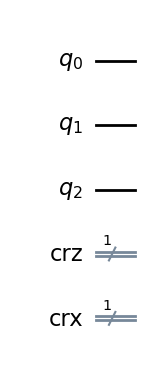

In [2]:
qr = QuantumRegister(3, name="q")    # 3개의 qubit를 사용하고
crz = ClassicalRegister(1, name="crz") # 측정 결과를 위해 2개의 classical bit를 사용합니다.
crx = ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

teleportation_circuit.draw("mpl")

#### Entanglement pair (Bell pair) 생성

얽힘 상태를 만드는 회로를 통해 다음과 같은 Entanglement pair $|\beta_{00}\rangle$을 만들고 첫번째 qubit는 Alice가, 두번째 qubit는 Bob이 갖습니다.  

<p align="center"><img src="image/b00.png" width="300px" height="300px" alt="b00"></p>  

얽힘 상태를 만드는 회로는 다음과 같습니다.
<p align="center"><img src="image/hcx.png" width="300px" height="300px" alt="hcx"></p>  

In [3]:
def create_bell_pair(qc, a, b):
    """얽힘 상태 만들기"""
    qc.h(a) # |+> 상태로 만들고
    qc.cx(a,b) # CNOT을 통해 얽힘 생성

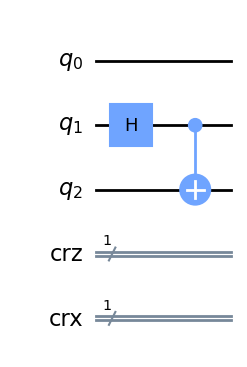

In [4]:
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.draw("mpl")

Alice (송신자)가 Bob (수신자)에게 보내고 싶은 상태가 아래 $|\psi\rangle$와 같다면
<p style="font-size:18px">$$|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$$</p>  

현재까지의 상태를 수식으로 나타내면 아래와 같습니다.
<p style="font-size:16px">$$|\psi_0\rangle=|\psi\rangle\otimes|\beta_{00}\rangle=(\alpha|0\rangle+\beta|1\rangle)\otimes(\frac{|00\rangle+|11\rangle}{\sqrt2})=\frac{1}{\sqrt2}[\alpha|0\rangle(|00\rangle+|11\rangle)+\beta|1\rangle(|00\rangle+|11\rangle)]$$</p>

**<p style="font-size:17px">Step 1&2. Bob에게 정보 전송</p>**  
Alice는 자신의 첫번째 qubit를 control로 하는 CNOT gate를 적용함으로써 Bob에게 자신의 qubit를 전송합니다.

<p align="center"><img src="image/psi1.png" width="900px" height="400px" alt="psi1"></p>  
$$|\psi_1\rangle=CNOT_{1,2}[\frac{1}{\sqrt2}[\alpha|0\rangle(|00\rangle+|11\rangle)+\beta|1\rangle(|00\rangle+|11\rangle)]]=\frac{1}{\sqrt2}[\alpha|0\rangle(|00\rangle+|11\rangle)+\beta|1\rangle(|10\rangle+|01\rangle)]$$  

또한 Alice는 자신의 첫번째 qubit에 Hadamard gate를 적용합니다.
<p align="center"><img src="image/psi2.png" width="900px" height="400px" alt="psi2"></p>  

In [5]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

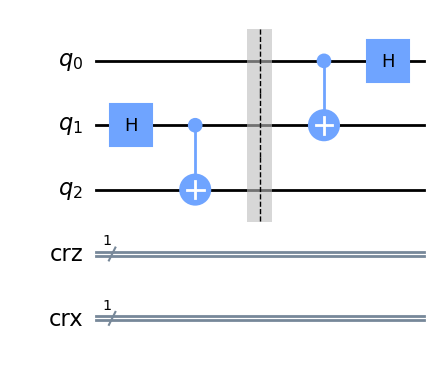

In [6]:
teleportation_circuit.barrier() # barrier 추가
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw("mpl")

**<p style="font-size:17px">Step 3. Alice 상태 측정</p>**  
Alice는 자신의 상태를 측정하고 classical channel을 통해 측정 결과를 전송합니다.

<p style="font-size:16px">$$|\psi_2\rangle=\frac{1}{\sqrt2}[|00\rangle(\alpha|0\rangle+\beta|1\rangle)+|01\rangle(\alpha|1\rangle+\beta|0\rangle)+|10\rangle(\alpha|0\rangle-\beta|1\rangle)+|11\rangle(\alpha|1\rangle-\beta|0\rangle)]$$</p>  
<p align="center"><img src="image/psi3.png" width="800px" height="300px" alt="psi3"></p>  

이 때의 density matrix를 통해 pure state인지 mixed state인지 확인해봅시다

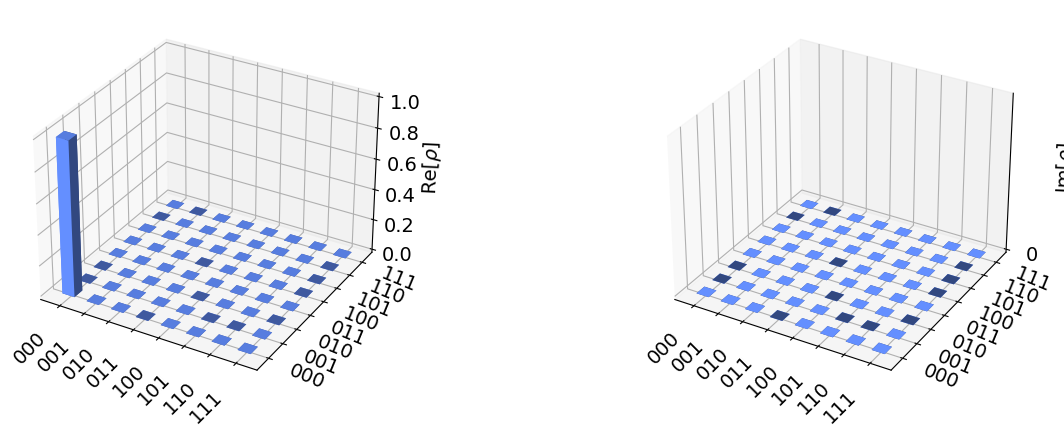

In [7]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city

sv=Statevector([1,0,0,0,0,0,0,0])
sv.evolve(teleportation_circuit)
plot_state_city(sv)

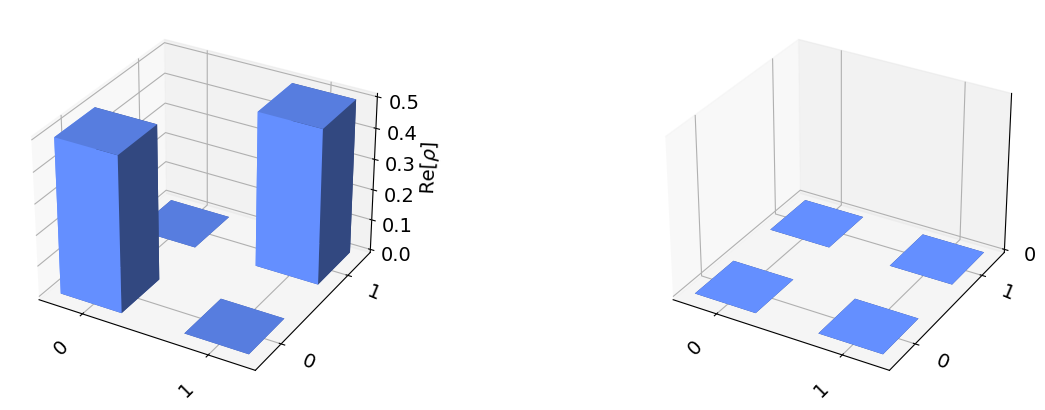

In [8]:
from qiskit.quantum_info import partial_trace, DensityMatrix

d = DensityMatrix(teleportation_circuit)
p = partial_trace(d,[0,1])
plot_state_city(p)

In [9]:
#Alice의 상태를 측정하고 Bob에게 측정 결과를 전송
def measure_and_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

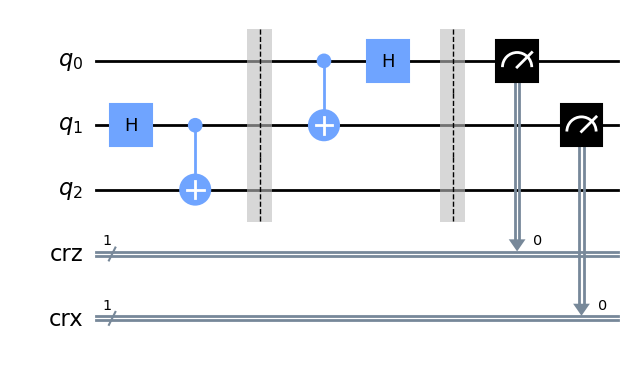

In [10]:
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw("mpl")

**<p style="font-size:17px">Step 4. Bob 수신 과정 </p>**  
Bob은 classical channel을 통해 받은 측정 결과를 바탕으로 처음 Alice가 보내고자 했던 상태를 갖기 위해 적절한 양자 게이트를 적용합니다.

<p align="center"><img src="image/psi4.png" width="800px" height="300px" alt="psi4"></p>  

In [11]:
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

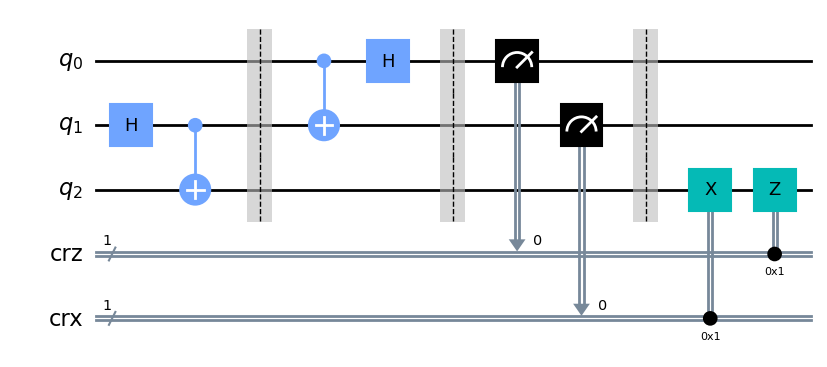

In [12]:
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw("mpl")

## 동적회로를 이용한 양자 순간이동

동적회로 (Dynamics)는 중간 회로 측정값을 포함하는 양자회로이며, 측정 결과는 회로의 후반부에서 양자 게이트를 조절하는데 사용됩니다.  

그렇담 양자 순간이동에서 동적회로를 어떻게 적용할 수 있을까요?

측정 결과에 따라 양자 게이트를 적용하는 부분...  
바로 측정 결과에 따라 Bob이 적용해주는 게이트가 달라지니까 그 부분에 적용할 수 있겠죠?

그럼 한번 사용해봅시다!

**<p style="font-size:17px">Step 0. Entangled pair $|\beta_{00}\rangle$ 생성</p>**
#### Quantum Circuit 정의

동적회로를 사용하는 양자 순간이동 프로토콜에는 Alice의 측정 결과를 담는 2개의 고전비트 뿐만 아니라 Bob의 측정 결과를 담는 고전비트도 필요합니다.
1. crz : Alice가 q0의 측정 결과를 저장할 때 사용할 비트 (Z gate 적용 여부를 결정)
2. crx : Alice가 q1의 측정 결과를 저장할 때 사용할 비트 (X gate 적용 여부를 결정)
3. crb : Bob이 q2의 측정 결과를 저장할 때 사용할 비트

In [13]:
qr = QuantumRegister(3, name="q") 
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx") #Alice의 측정 결과를 저장할 고전 비트
crb = ClassicalRegister(1, name="crb") #Bob의 측정 결과를 저장할 고전 비트

dynamics_teleportation_circuit = QuantumCircuit(qr, crz, crx, crb)

#### Entanglement pair (Bell pair) 생성

In [14]:
def create_bell_pair(qc, a, b):
    """얽힘 상태 만들기"""
    qc.h(a) # |+> 상태로 만들고
    qc.cx(a,b) # CNOT을 통해 얽힘 생성

In [15]:
create_bell_pair(dynamics_teleportation_circuit, 1, 2)

**<p style="font-size:17px">Step 1&2. Bob에게 정보 전송</p>**  

In [16]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

In [17]:
dynamics_teleportation_circuit.barrier() # barrier 추가
alice_gates(dynamics_teleportation_circuit, 0, 1)

**<p style="font-size:17px">Step 3. Alice 상태 측정</p>**  

In [18]:
#Alice의 상태를 측정하고 Bob에게 측정 결과를 전송
def measure_and_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [19]:
measure_and_send(dynamics_teleportation_circuit, 0 ,1)

Step 0부터 3까지는 이전과 동일합니다.  
지금까지의 회로는 다음과 같습니다.

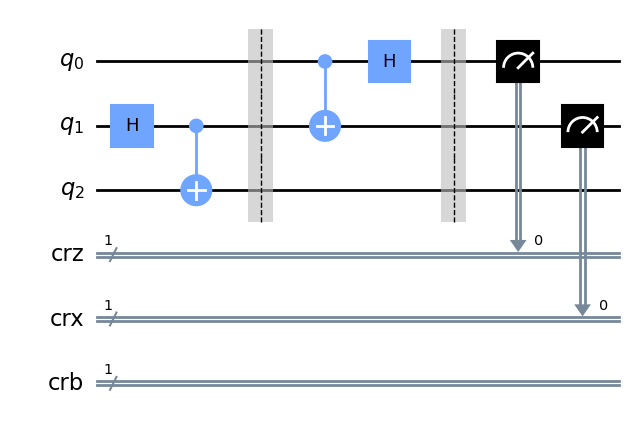

In [20]:
dynamics_teleportation_circuit.draw("mpl")

**<p style="font-size:17px">Step 4. Bob 수신 과정 </p>**  
Bob은 classical channel을 통해 받은 측정 결과를 바탕으로 처음 Alice가 보내고자 했던 상태를 갖기 위해 적절한 양자 게이트를 적용하게 됩니다.  
이 과정에서 동적 회로를 어떻게 적용할 수 있을까요?  

동적 회로는 기존의 c_if() 명령어 대신 [if_test()](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.if_test.html) 명령어를 선호합니다.  
기존의 c_if() 명령어는 if문처럼 QuantumCircuit의 측정 결과에 따라 그에 해당하는 동작을 진행하게 되는데요,  
if_test() 명령어도 동일한 방식으로 진행이 됩니다.  

if_test() 명령어의 예시는 아래와 같습니다.

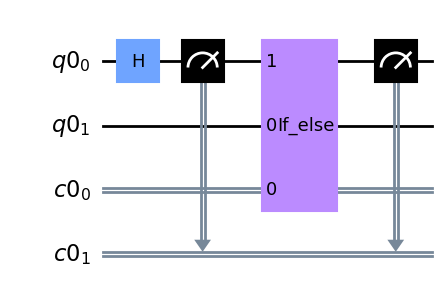

In [21]:
# 1개의 큐비트와 2개의 고전 비트로 회로 초기화
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# 0번째 큐비트에 하다마드 게이트 적용
qc.h(0)

# 0번째 큐비트 측정 후 0번째 고전 비트에 측정 결과 저장
qc.measure(0,1)

# 0번째 고전 비트에 저장되어 있는 측정 결과가 1과 같으면, if_test 블록 시작
with qc.if_test ((0,1)) as else_:
    qc.x(0) # 측정 결과가 1이라면, 0번째 큐비트에 X 게이트 적용
with else_ :
    qc.x(1)

# 0번째 큐비트를 다시 측정 후 1번째 고전 비트에 측정 결과 저장
qc.measure(0,1)

qc.draw("mpl")

이제 동적회로에서 사용하는 if_test()를 양자 순간이동에 적용해봅시다!

앞서 살펴봤던 표를 다시 참고해보면,  
<p align="center"><img src="image/psi4.png" width="800px" height="300px" alt="psi4"></p>  

Alice의 측정 결과가  
01일 때(crz=0, crx=1)는 X 게이트를    
10일 때(crz=1, crx=0)는 Z 게이트를  
11일 때(crz=1, crx=1)는 ZX 게이트를 적용해주게 됩니다.  
         
이를 if_test()를 사용하여 나타내주면 다음과 같습니다.

In [22]:
def bob_gates(qc, qubit, crz, crx):
    with qc.if_test((crx, 1)): #crx에 저장되어 있는 고전 비트가 1이라면 해당 블록 실행
        qc.x(qubit)
    with qc.if_test((crz, 1)): #crz에 저장되어 있는 고전 비트가 1이라면 해당 블록 실행
        qc.z(qubit)

In [23]:
dynamics_teleportation_circuit.barrier()
bob_gates(dynamics_teleportation_circuit, 2, crz, crx)

마지막으로, Bob은 Alice가 전송한 상태를 확인하기 위해 qubit를 측정하게 됩니다.  
그리고 측정 결과는 crb라는 고전 비트에 저장합니다.

In [24]:
dynamics_teleportation_circuit.measure(2, crb)

동적회로를 사용한 양자 순간이동의 전체적인 회로 모습은 아래와 같습니다.

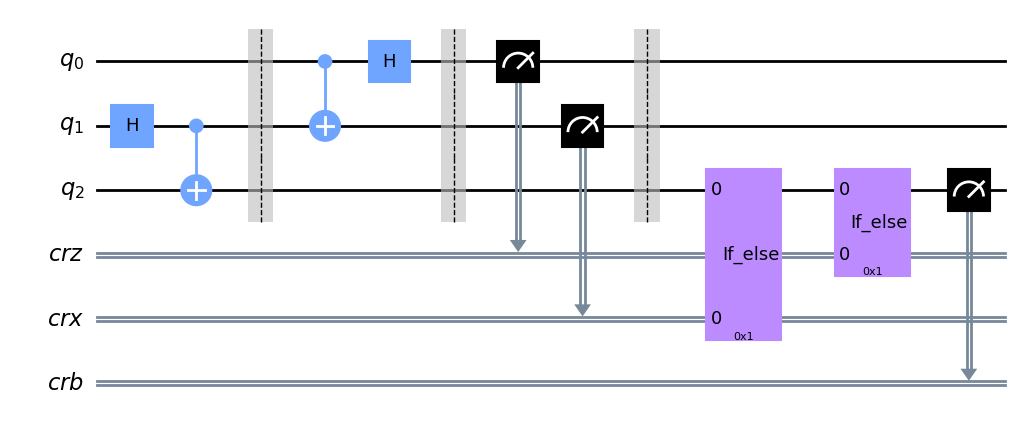

In [25]:
dynamics_teleportation_circuit.draw("mpl")

## 백엔드 구현
### 1. 시뮬레이터 구현
Aer 시뮬레이터를 사용하여 양자 순간이동 회로를 구현해보고, 결과를 확인해봅시다.

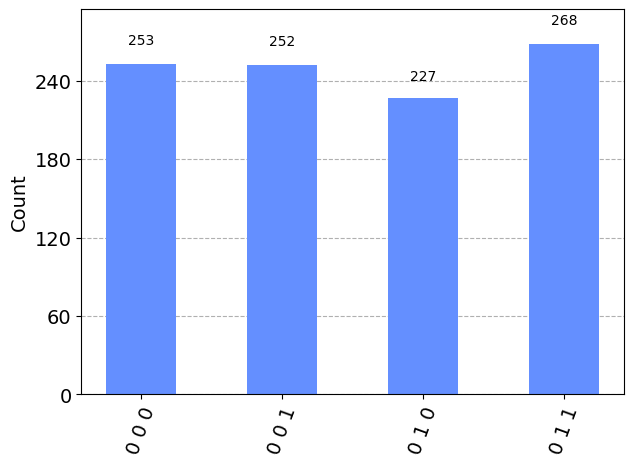

In [26]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

sim = AerSimulator()
transpiled_circuit = transpile(dynamics_teleportation_circuit, sim)

# 시뮬레이션 시작
shots = 1000
job = sim.run(transpiled_circuit, shots=shots, dynamic=True)

# 결과 출력
exp_result = job.result()
exp_counts = exp_result.get_counts()
plot_histogram(exp_counts)

Bob의 측정 분포 결과만을 얻기 위해 다른 측정된 비트에 대해 한계화(marginalizing)를 해줍니다.

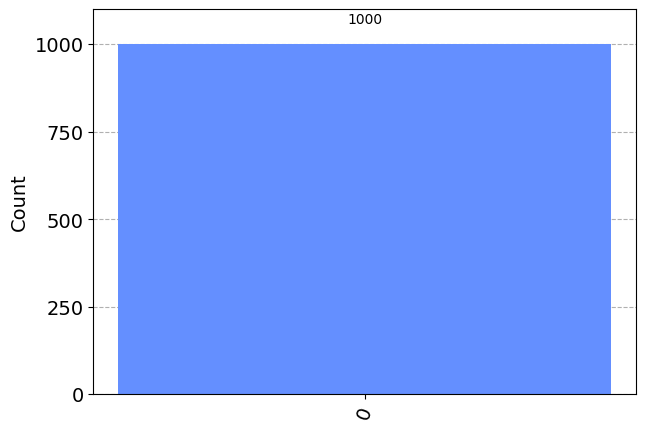

In [27]:
from qiskit.result import marginal_counts

bobs_qubit=2
bobs_counts = marginal_counts(exp_counts, [bobs_qubit])
plot_histogram(bobs_counts)

Alice가 0을 보냈으므로 Bob도 100%의 확률로 0을 받은 것을 확인할 수 있습니다.

### 2. Alice의 상태에 따른 결과 확인
시뮬레이터에서 올바른 결과가 나온 것을 확인하였으니 Alice의 상태를 바꿔가면서 결과가 어떻게 나오는지 확인해봅시다.

#### 1) 들뜬 상태
Alice의 qubit를 들뜬 상태(1)로 두었을 때 결과가 어떻게 나올까요?  
이 경우 Bob의 측정 결과는 1이 나올 것입니다.

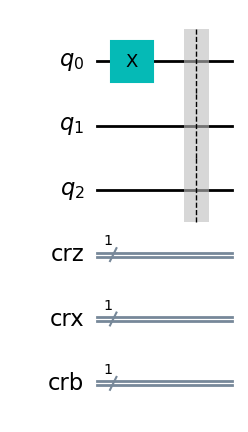

In [28]:
qr = QuantumRegister(3, name="q") 
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx") #Alice의 측정 결과를 저장할 고전 비트
crb = ClassicalRegister(1, name="crb") #Bob의 측정 결과를 저장할 고전 비트

ex_teleportation_circuit=QuantumCircuit(qr, crz, crx, crb)

#Alice의 qubit를 들뜬 상태로 만들기
ex_teleportation_circuit.x(0)
ex_teleportation_circuit.barrier()

ex_teleportation_circuit.draw("mpl")

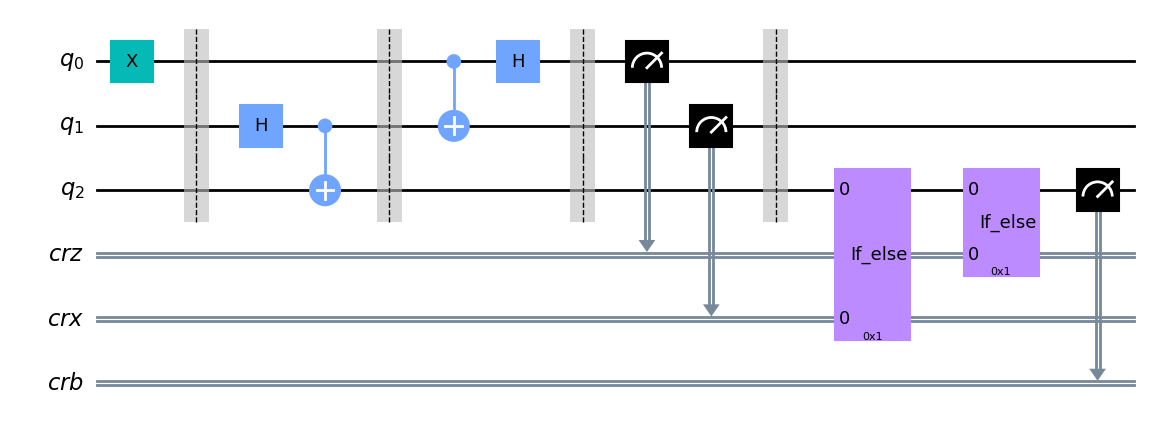

In [29]:
teleport_excited_circuit = ex_teleportation_circuit.compose(dynamics_teleportation_circuit)
teleport_excited_circuit.draw("mpl")

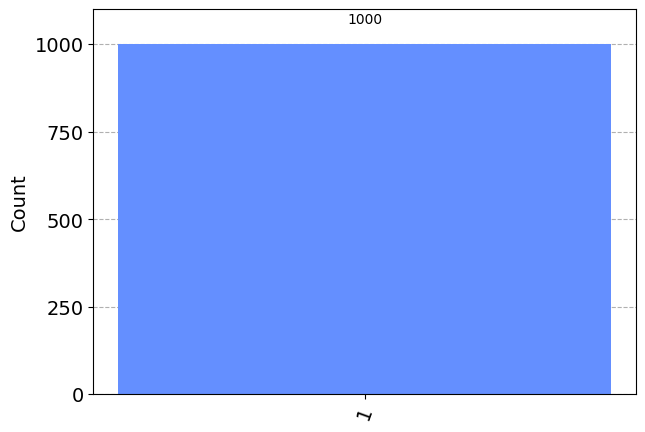

In [30]:
ex_transpiled_circuit = transpile(teleport_excited_circuit, sim)

# 시뮬레이션 시작
shots = 1000
ex_job = sim.run(ex_transpiled_circuit, shots=shots, dynamic=True)

# 결과 출력
ex_exp_result = ex_job.result()
ex_exp_counts = ex_exp_result.get_counts()

ex_bobs_counts = marginal_counts(ex_exp_counts, [bobs_qubit])
plot_histogram(ex_bobs_counts)

Alice가 1을 보냈으므로 Bob도 100%의 확률로 1을 받은 것을 확인할 수 있습니다.

#### 2) 중첩 상태
Alice의 qubit를 중첩 상태로 두었을 때 결과가 어떻게 나올까요?  
이 경우 Bob의 측정 결과는 중첩 상태로, 0과 1이 각각 절반의 확률로 나올 것입니다.

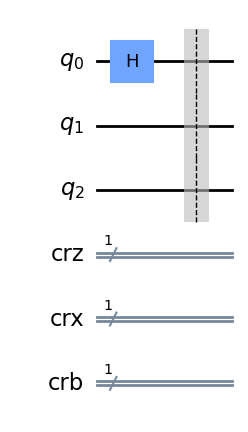

In [31]:
h_teleportation_circuit=QuantumCircuit(qr, crz, crx, crb)

#Alice의 qubit를 들뜬 상태로 만들기
h_teleportation_circuit.h(0)
h_teleportation_circuit.barrier()

h_teleportation_circuit.draw("mpl")

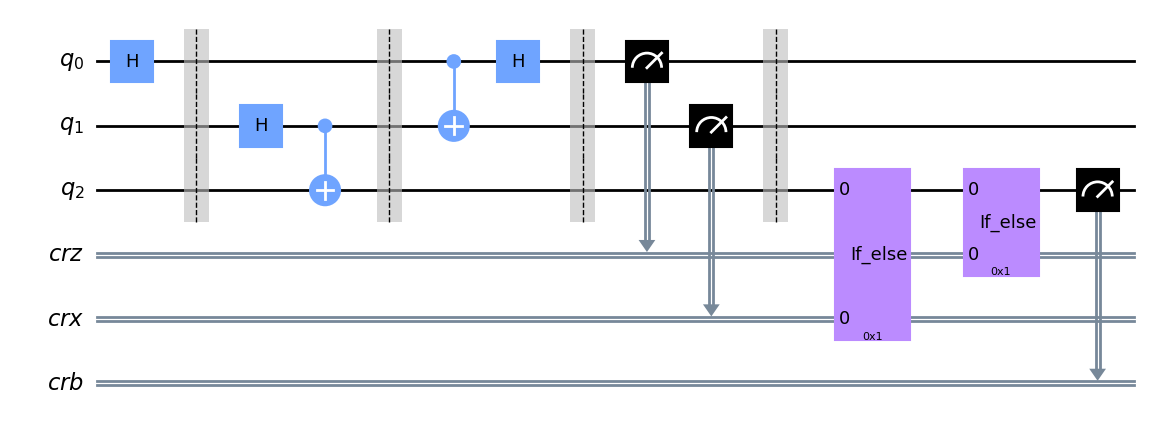

In [32]:
teleport_h_circuit = h_teleportation_circuit.compose(dynamics_teleportation_circuit)
teleport_h_circuit.draw("mpl")

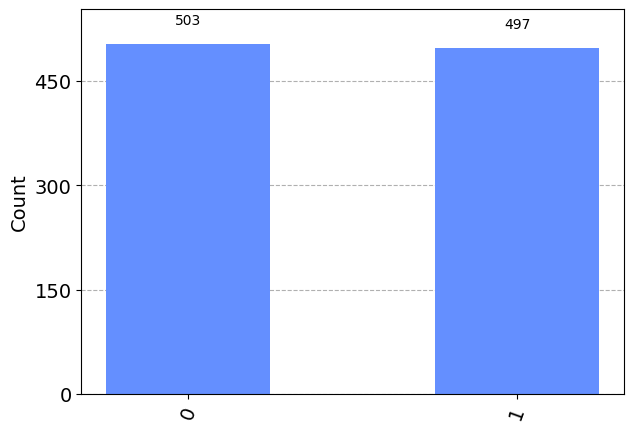

In [33]:
h_transpiled_circuit = transpile(teleport_h_circuit, sim)

# 시뮬레이션 시작
shots = 1000
h_job = sim.run(h_transpiled_circuit, shots=shots, dynamic=True)

# 결과 출력
h_exp_result = h_job.result()
h_exp_counts = h_exp_result.get_counts()

h_bobs_counts = marginal_counts(h_exp_counts, [bobs_qubit])
plot_histogram(h_bobs_counts)

Alice가 0과 1이 중첩된 상태를 보냈으므로 Bob도 100%의 확률로 중첩된 상태를 받은 것을 확인할 수 있습니다.